# Running and analysing a basic queueing network with Ciw

### Import Ciw and any other libraries

In [57]:
%matplotlib inline

In [58]:
import ciw
import matplotlib.pyplot as plt

### First define the parameters dictionary

In [59]:
params = {
    'Arrival_distributions': {'Class 0': [['Exponential', 6.0], ['Exponential', 2.5]]},
    'Number_of_nodes': 2,
    'Number_of_servers': [1, 1],
    'Queue_capacities': ['Inf', 4],
    'Number_of_classes': 1,
    'Service_distributions': {'Class 0': [['Exponential', 8.5], ['Exponential', 5.5]]},
    'Transition_matrices': {'Class 0': [[0.0, 0.2], [0.1, 0.0]]}
}

### Now create a Network object from that dictionary, and simulate for 1000 time units

In [60]:
N = ciw.create_network(params)
Q = ciw.Simulation(N)

In [61]:
Q.simulate_until_max_time(1000)

### The simulation is now run, let's analyse waiting times, determine a warm-up time of 50 time units

In [62]:
recs = Q.get_all_records()

In [63]:
waits = [r.waiting_time for r in recs if r.arrival_date > 50]

In [64]:
mean_wait = sum(waits)/len(waits)
print(mean_wait)

0.3062128466516825


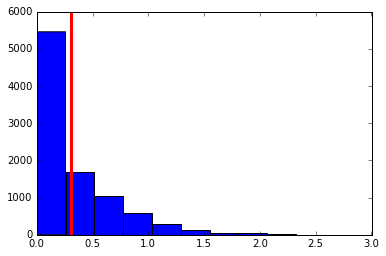

In [65]:
plt.hist(waits)
plt.axvline(x=mean_wait, linewidth=3, c='r')
plt.show()